/tmp/ipykernel_70/4157207610.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data_cross, x=predictor, y='WELLNESS_life_satisfaction', palette='Set2')
/tmp/ipykernel_70/4157207610.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data_cross, x=predictor, y='WELLNESS_life_satisfaction', palette='Set2')
/tmp/ipykernel_70/4157207610.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data_cross, x=predictor, y='WELLNESS_life_satisfaction', palette='Set2')
/tmp/ipykernel_70/4157207610.py:22: FutureWarning: 

Passing `palet

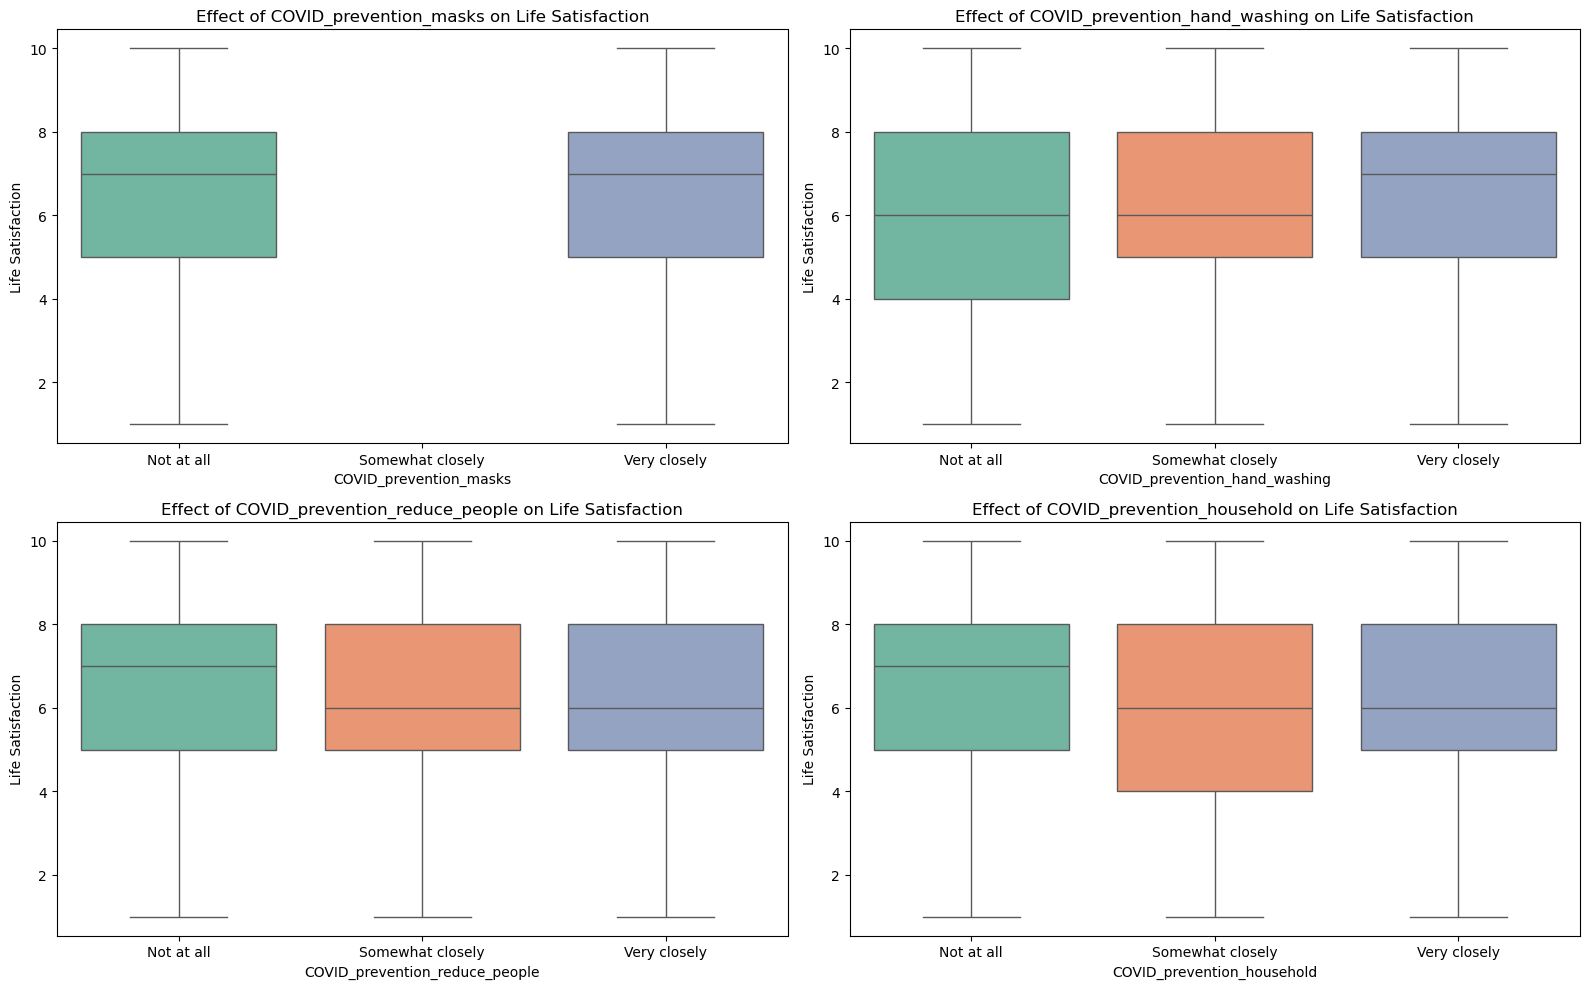

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select the columns to plot
predictors = ['COVID_prevention_masks', 
    'COVID_prevention_hand_washing',
    'COVID_prevention_reduce_people',
    'COVID_prevention_household'
]

# Define the desired order for the categorical variables
category_order = ['Not at all', 'Somewhat closely', 'Very closely']

# Convert the predictor columns to categorical type with the specified order
for predictor in predictors:
    data_cross[predictor] = pd.Categorical(data_cross[predictor], categories=category_order, ordered=True)

# Set up the figure for subplots
plt.figure(figsize=(16, 10))
for i, predictor in enumerate(predictors, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(data=data_cross, x=predictor, y='WELLNESS_life_satisfaction', palette='Set2')
    plt.title(f"Effect of {predictor} on Life Satisfaction")
    plt.xlabel(predictor)
    plt.ylabel("Life Satisfaction")

plt.tight_layout()
plt.show()

In [7]:
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf

# Load the column names and main dataset, handling missing values
cols = pd.read_csv("https://raw.githubusercontent.com/pointOfive/stat130chat130/main/CP/var_names.csv")
data = pd.read_csv("https://raw.githubusercontent.com/pointOfive/stat130chat130/main/CP/CSCS_data_anon.csv",
                   na_values=["9999", "", " ", "Presented but no response", "NA"])

# Step 1: Filter for cross-sectional data only
data_cross = data[data['REMOVE_case'] == 'No'].copy()

# Specify the pet columns
COVID_columns = [
    'COVID_prevention_masks', 
    'COVID_prevention_reduce_people'
]

# Drop rows with missing values in pet columns
data_cross = data_cross.dropna(subset=COVID_columns + ['LONELY_change_pre_covid'])

# Define the binary satisfaction outcome
data_cross['lonely_binary'] = np.where(
    data_cross['LONELY_change_pre_covid'].isin(['Somewhat more lonely', 'Much more lonely']), 1, 0)

# Fit the logistic regression model with pet ownership as the predictor
formula  = 'lonely_binary ~ COVID_prevention_masks + COVID_prevention_reduce_people'
logit_model_lonely = smf.logit(formula=formula, data=data_cross).fit()

# Print model summary
print(logit_model_lonely.summary())

/tmp/ipykernel_53/1833580.py:7: DtypeWarning: Columns (129,408,630,671,689,978,1001,1002,1006,1007,1008,1080,1113,1115,1116,1117,1118,1119,1120,1121,1124,1125,1126,1127,1128,1213,1214,1215,1216,1217,1218,1263,1266,1342,1343,1344,1345,1346,1347,1348,1349,1390,1391,1393,1439,1442,1463,1546,1549,1552,1555,1558,1561) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("https://raw.githubusercontent.com/pointOfive/stat130chat130/main/CP/CSCS_data_anon.csv",


Optimization terminated successfully.
         Current function value: 0.669224
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:          lonely_binary   No. Observations:                 3071
Model:                          Logit   Df Residuals:                     3066
Method:                           MLE   Df Model:                            4
Date:                Sun, 17 Nov 2024   Pseudo R-squ.:                0.008583
Time:                        02:50:33   Log-Likelihood:                -2055.2
converged:                       True   LL-Null:                       -2073.0
Covariance Type:            nonrobust   LLR p-value:                 3.522e-07
                                                         coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------
Intercept                   

/tmp/ipykernel_53/3878361787.py:15: DtypeWarning: Columns (129,408,630,671,689,978,1001,1002,1006,1007,1008,1080,1113,1115,1116,1117,1118,1119,1120,1121,1124,1125,1126,1127,1128,1213,1214,1215,1216,1217,1218,1263,1266,1342,1343,1344,1345,1346,1347,1348,1349,1390,1391,1393,1439,1442,1463,1546,1549,1552,1555,1558,1561) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("https://raw.githubusercontent.com/pointOfive/stat130chat130/main/CP/CSCS_data_anon.csv",


lonely_binary
1    1827
0    1244
Name: count, dtype: int64
              precision    recall  f1-score   support

           0       0.54      0.31      0.39       118
           1       0.53      0.75      0.62       122

    accuracy                           0.53       240
   macro avg       0.53      0.53      0.50       240
weighted avg       0.53      0.53      0.50       240



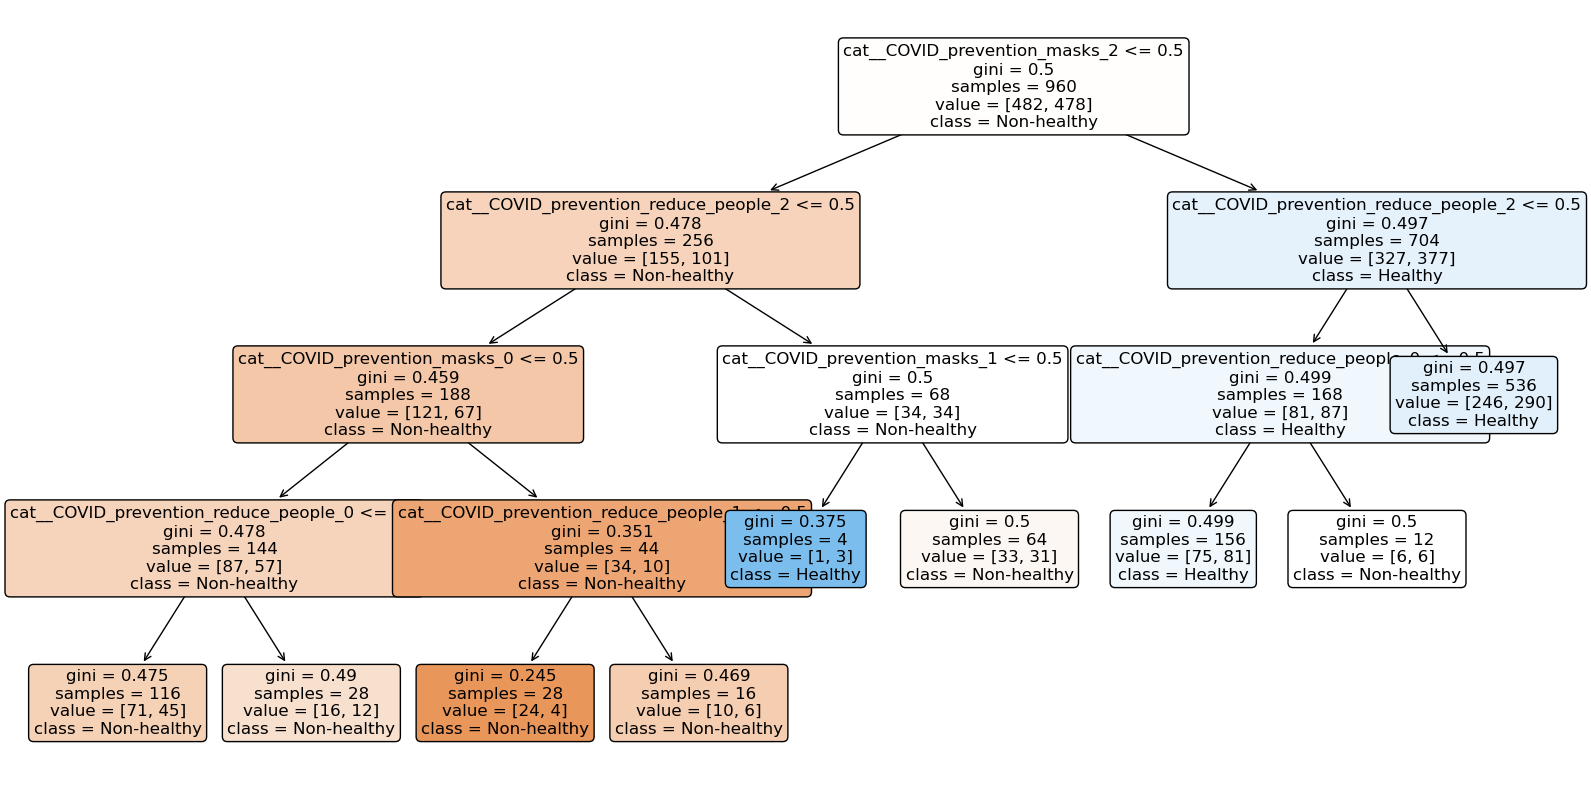

In [9]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt

# Load the column names and main dataset, handling missing values
cols = pd.read_csv("https://raw.githubusercontent.com/pointOfive/stat130chat130/main/CP/var_names.csv")
data = pd.read_csv("https://raw.githubusercontent.com/pointOfive/stat130chat130/main/CP/CSCS_data_anon.csv",
                   na_values=["9999", "", " ", "Presented but no response", "NA"])

# Step 1: Filter for cross-sectional data only
data_cross = data[data['REMOVE_case'] == 'No'].copy()

# Specify the relevant columns
COVID_columns = [
    'COVID_prevention_masks',
    'COVID_prevention_reduce_people'
]

# Drop rows with missing values in the relevant columns
data_cross = data_cross.dropna(subset=COVID_columns + ['LONELY_change_pre_covid'])

# Define the binary outcome variable for physical health
data_cross['lonely_binary'] = np.where(
    data_cross['LONELY_change_pre_covid'].isin(['Somewhat more lonely', 'Much more lonely']), 1, 0)

# Step 2: Separate the data into two groups based on the physical_binary outcome
healthy = data_cross[data_cross['lonely_binary'] == 1]
non_healthy = data_cross[data_cross['lonely_binary'] == 0]

print(data_cross['lonely_binary'].value_counts())

# Step 3: Sample 2000 rows from each group (if there are enough rows)
healthy_sample = healthy.sample(n=600, random_state=42)
non_healthy_sample = non_healthy.sample(n=600, random_state=42)

# Step 4: Combine the samples into one dataset
data_sampled = pd.concat([healthy_sample, non_healthy_sample])

# Step 5: Convert categorical columns to numeric using Label Encoding
le = LabelEncoder()

# Apply label encoding to each of the COVID columns
for col in COVID_columns:
    data_sampled[col] = le.fit_transform(data_sampled[col])

# Step 6: Prepare the features and target variable
X = data_sampled[COVID_columns]
y = data_sampled['lonely_binary']

# Step 6: Use One-Hot Encoding for categorical columns
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), COVID_columns)  # OneHotEncoder for categorical columns
    ])

# Step 7: Create a pipeline to preprocess data and train the Decision Tree model
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(max_depth=4, random_state=42))  # Set max_depth to limit the depth of the tree
])

# Step 8: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 9: Train the Decision Tree model
model.fit(X_train, y_train)

# Step 10: Make predictions and evaluate the model
y_pred = model.predict(X_test)

# Output the classification report
print(classification_report(y_test, y_pred))

# Plot the decision tree
plt.figure(figsize=(20, 10))
plot_tree(model.named_steps['classifier'], 
          filled=True, 
          feature_names=model.named_steps['preprocessor'].get_feature_names_out(),  # Feature names after OneHotEncoding
          class_names=['Non-healthy', 'Healthy'],  # Class labels for binary target
          rounded=True, 
          fontsize=12)
plt.show()

In [41]:
import numpy as np
import pandas as pd
from scipy import stats

# Load the column names and main dataset, handling missing values
cols = pd.read_csv("https://raw.githubusercontent.com/pointOfive/stat130chat130/main/CP/var_names.csv")
data = pd.read_csv("https://raw.githubusercontent.com/pointOfive/stat130chat130/main/CP/CSCS_data_anon.csv",
                   na_values=["9999", "", " ", "Presented but no response", "NA"])

# Step 1: Filter for cross-sectional data only
data_cross = data[data['REMOVE_case'] == 'No'].copy()

# Specify the COVID columns
COVID_columns = [
    'COVID_prevention_masks', 
    'COVID_prevention_hand_washing',
    'COVID_prevention_reduce_people',
    'COVID_prevention_household'
]

# Drop rows with missing values in relevant columns
data_cross = data_cross.dropna(subset=COVID_columns + ['WELLNESS_life_satisfaction'])

# Function to perform permutation test
def permutation_test(data, group_col, outcome_col, category_group, category_2, n_permutations=10000):
    # Group the data by the category
    group1 = data[data[group_col].isin(category_group)][outcome_col]  # Category group: Very closely and Somewhat closely
    group2 = data[data[group_col] == category_2][outcome_col]  # Category 2: Not at all
    
    # Calculate the observed difference in means
    observed_diff = np.mean(group1) - np.mean(group2)
    
    # Concatenate both groups to perform permutations
    combined_data = np.concatenate([group1, group2])
    
    # Initialize an array to store the permuted differences
    permuted_diffs = np.zeros(n_permutations)
    
    # Permutation loop
    for i in range(n_permutations):
        # Shuffle the combined data and split back into two groups
        np.random.shuffle(combined_data)
        perm_group1 = combined_data[:len(group1)]
        perm_group2 = combined_data[len(group1):]
        
        # Calculate the difference in means for the permuted groups
        permuted_diffs[i] = np.mean(perm_group1) - np.mean(perm_group2)
    
    # Calculate the p-value
    p_value = np.mean(np.abs(permuted_diffs) >= np.abs(observed_diff))
    
    return observed_diff, p_value

# Perform the permutation test for each predictor variable
n_permutations = 10000  # Number of permutations

for col in COVID_columns:
    print(f"Permutation test for {col}:")
    
    # Check if 'Not at all' and ('Very closely' or 'Somewhat closely') categories are present
    if 'Not at all' in data_cross[col].values:
        # Group 'Very closely' and 'Somewhat closely' together
        category_group = ['Very closely', 'Somewhat closely']
        observed_diff, p_value = permutation_test(data_cross, col, 'WELLNESS_life_satisfaction', category_group, 'Not at all', n_permutations)
        print(f"Observed difference: {observed_diff:.4f}")
        print(f"P-value: {p_value:.4f}")
    
    print()


/tmp/ipykernel_70/2581414381.py:7: DtypeWarning: Columns (129,408,630,671,689,978,1001,1002,1006,1007,1008,1080,1113,1115,1116,1117,1118,1119,1120,1121,1124,1125,1126,1127,1128,1213,1214,1215,1216,1217,1218,1263,1266,1342,1343,1344,1345,1346,1347,1348,1349,1390,1391,1393,1439,1442,1463,1546,1549,1552,1555,1558,1561) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("https://raw.githubusercontent.com/pointOfive/stat130chat130/main/CP/CSCS_data_anon.csv",


Permutation test for COVID_prevention_masks:
Observed difference: -0.0513
P-value: 0.3933

Permutation test for COVID_prevention_hand_washing:
Observed difference: 0.5301
P-value: 0.0000

Permutation test for COVID_prevention_reduce_people:
Observed difference: -0.1893
P-value: 0.0029

Permutation test for COVID_prevention_household:
Observed difference: -0.2223
P-value: 0.0002



/tmp/ipykernel_70/993944234.py:8: DtypeWarning: Columns (129,408,630,671,689,978,1001,1002,1006,1007,1008,1080,1113,1115,1116,1117,1118,1119,1120,1121,1124,1125,1126,1127,1128,1213,1214,1215,1216,1217,1218,1263,1266,1342,1343,1344,1345,1346,1347,1348,1349,1390,1391,1393,1439,1442,1463,1546,1549,1552,1555,1558,1561) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("https://raw.githubusercontent.com/pointOfive/stat130chat130/main/CP/CSCS_data_anon.csv",


Bootstrap test for COVID_prevention_masks:
Observed difference for COVID_prevention_masks: -0.0513
95% Confidence Interval for COVID_prevention_masks: -0.1652 to 0.0619
Bootstrap test for COVID_prevention_hand_washing:
Observed difference for COVID_prevention_hand_washing: 0.5301
95% Confidence Interval for COVID_prevention_hand_washing: 0.2751 to 0.7888
Bootstrap test for COVID_prevention_reduce_people:
Observed difference for COVID_prevention_reduce_people: -0.1893
95% Confidence Interval for COVID_prevention_reduce_people: -0.3124 to -0.0697
Bootstrap test for COVID_prevention_household:
Observed difference for COVID_prevention_household: -0.2223
95% Confidence Interval for COVID_prevention_household: -0.3357 to -0.1116


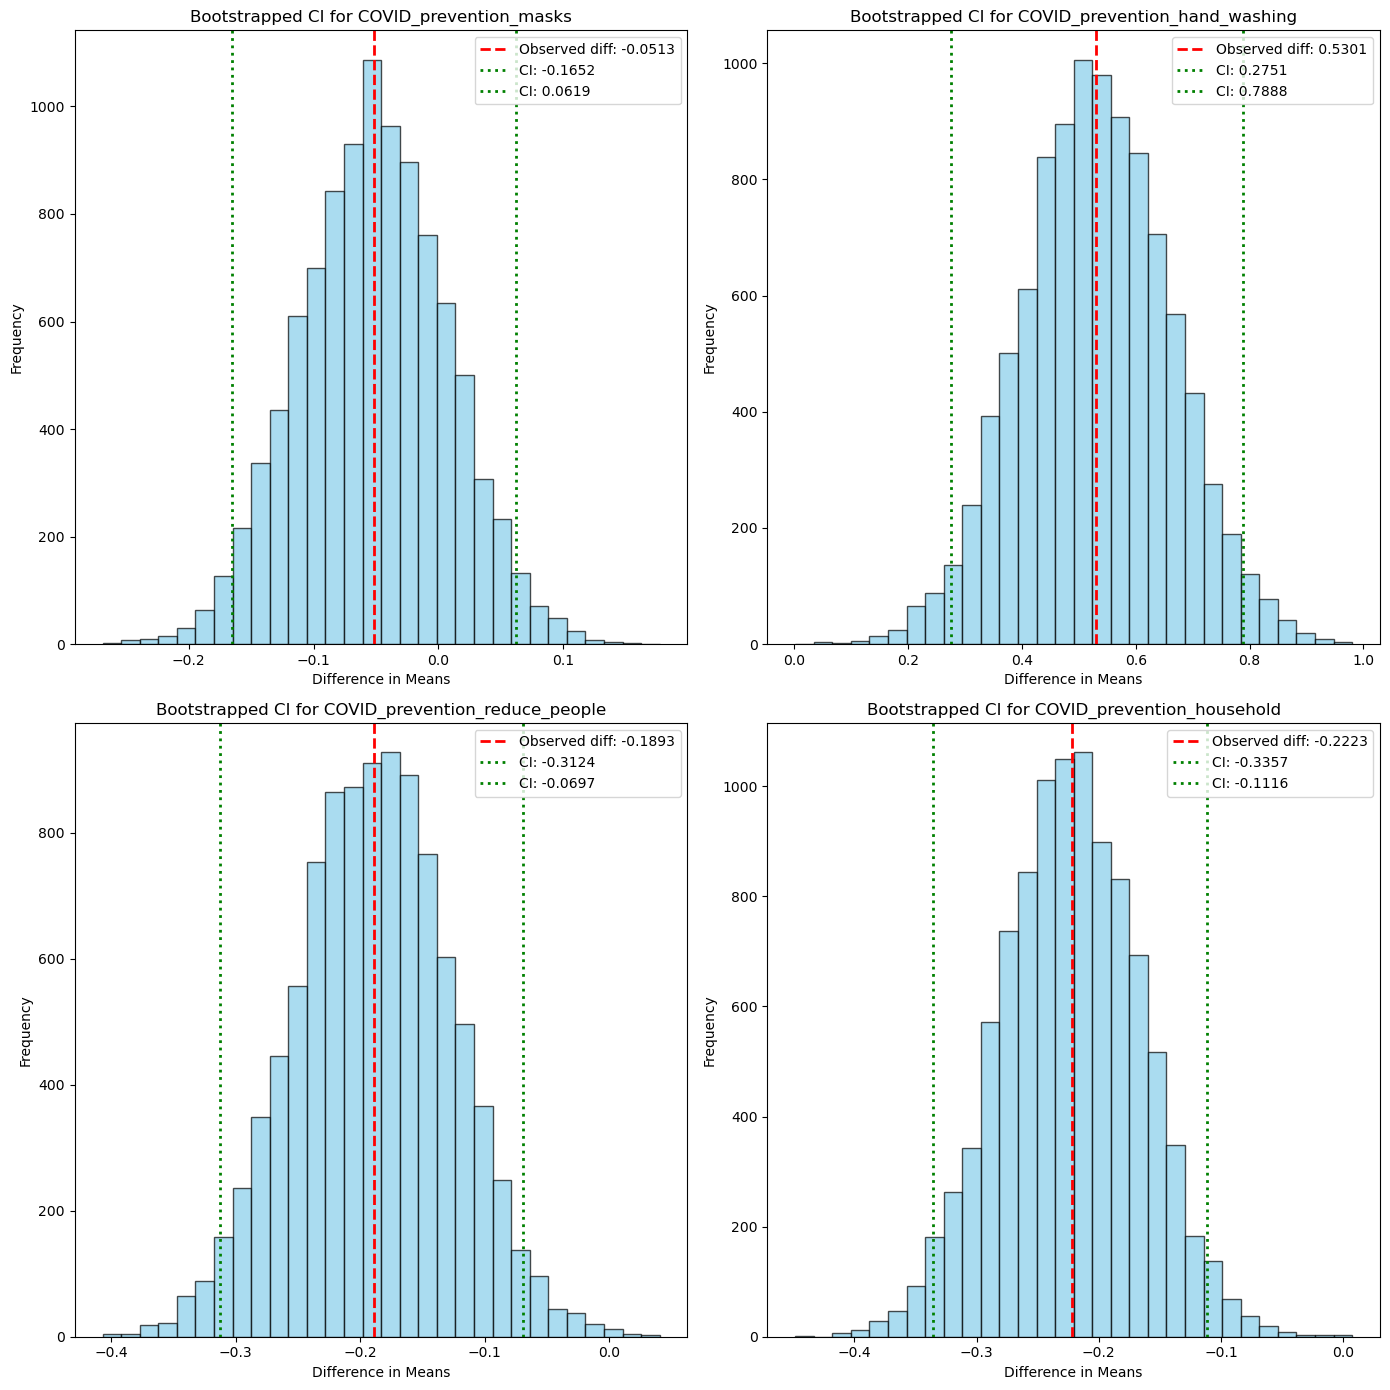

In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.utils import resample

# Load the column names and main dataset, handling missing values
cols = pd.read_csv("https://raw.githubusercontent.com/pointOfive/stat130chat130/main/CP/var_names.csv")
data = pd.read_csv("https://raw.githubusercontent.com/pointOfive/stat130chat130/main/CP/CSCS_data_anon.csv",
                   na_values=["9999", "", " ", "Presented but no response", "NA"])

# Step 1: Filter for cross-sectional data only
data_cross = data[data['REMOVE_case'] == 'No'].copy()

# Specify the COVID columns
COVID_columns = [
    'COVID_prevention_masks', 
    'COVID_prevention_hand_washing',
    'COVID_prevention_reduce_people',
    'COVID_prevention_household'
]

# Drop rows with missing values in relevant columns
data_cross = data_cross.dropna(subset=COVID_columns + ['WELLNESS_life_satisfaction'])

# Function to perform bootstrapping and plot results
def bootstrap_ci(data, group_col, outcome_col, category_group, category_2, n_bootstrap=10000, alpha=0.05):
    # Group the data by the category
    group1 = data[data[group_col].isin(category_group)][outcome_col]  # Category group: Very closely and Somewhat closely
    group2 = data[data[group_col] == category_2][outcome_col]  # Category 2: Not at all
    
    # Calculate the observed difference in means
    observed_diff = np.mean(group1) - np.mean(group2)
    
    # Initialize an array to store the bootstrap differences
    bootstrap_diffs = np.zeros(n_bootstrap)
    
    # Bootstrapping loop
    for i in range(n_bootstrap):
        # Resample both groups with replacement
        resample_group1 = resample(group1)
        resample_group2 = resample(group2)
        
        # Calculate the difference in means for the resampled groups
        bootstrap_diffs[i] = np.mean(resample_group1) - np.mean(resample_group2)
    
    # Calculate the bootstrap confidence interval (2.5% and 97.5% percentiles)
    conf_int = np.percentile(bootstrap_diffs, [100 * alpha / 2, 100 * (1 - alpha / 2)])
    
    return observed_diff, bootstrap_diffs, conf_int

# Function to plot results into a 2x2 grid of subplots
def plot_bootstrap_results(ax, observed_diff, bootstrap_diffs, conf_int, predictor_name):
    # Create a histogram of the bootstrap differences
    ax.hist(bootstrap_diffs, bins=30, color='skyblue', edgecolor='black', alpha=0.7)
    
    # Plot the observed difference
    ax.axvline(observed_diff, color='red', linestyle='dashed', linewidth=2, label=f'Observed diff: {observed_diff:.4f}')
    
    # Plot the bootstrap confidence intervals
    ax.axvline(conf_int[0], color='green', linestyle='dotted', linewidth=2, label=f'CI: {conf_int[0]:.4f}')
    ax.axvline(conf_int[1], color='green', linestyle='dotted', linewidth=2, label=f'CI: {conf_int[1]:.4f}')
    
    # Add titles and labels
    ax.set_title(f'Bootstrapped CI for {predictor_name}')
    ax.set_xlabel('Difference in Means')
    ax.set_ylabel('Frequency')
    ax.legend()

# Prepare the plotting grid (2x2)
fig, axes = plt.subplots(2, 2, figsize=(14, 14))
axes = axes.flatten()  # Flatten the axes to loop through them easily

# Perform the bootstrap test for each predictor variable and plot results
n_bootstrap = 10000  # Number of bootstrap iterations
alpha = 0.05  # Confidence level

plot_idx = 0  # Index for the subplot grid
for col in COVID_columns:
    print(f"Bootstrap test for {col}:")
    
    # Check if 'Not at all' and ('Very closely' or 'Somewhat closely') categories are present
    if 'Not at all' in data_cross[col].values:
        # Group 'Very closely' and 'Somewhat closely' together
        category_group = ['Very closely', 'Somewhat closely']
        observed_diff, bootstrap_diffs, conf_int = bootstrap_ci(
            data_cross, col, 'WELLNESS_life_satisfaction', category_group, 'Not at all', n_bootstrap, alpha
        )
        
        # Output the results
        print(f"Observed difference for {col}: {observed_diff:.4f}")
        print(f"95% Confidence Interval for {col}: {conf_int[0]:.4f} to {conf_int[1]:.4f}")
        
        # Plot the results for each predictor in the corresponding subplot
        plot_bootstrap_results(axes[plot_idx], observed_diff, bootstrap_diffs, conf_int, col)
        
        plot_idx += 1  # Move to the next subplot

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

/tmp/ipykernel_70/2080481681.py:8: DtypeWarning: Columns (129,408,630,671,689,978,1001,1002,1006,1007,1008,1080,1113,1115,1116,1117,1118,1119,1120,1121,1124,1125,1126,1127,1128,1213,1214,1215,1216,1217,1218,1263,1266,1342,1343,1344,1345,1346,1347,1348,1349,1390,1391,1393,1439,1442,1463,1546,1549,1552,1555,1558,1561) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("https://raw.githubusercontent.com/pointOfive/stat130chat130/main/CP/CSCS_data_anon.csv",


Permutation test for COVID_prevention_masks:
Observed difference for COVID_prevention_masks: -0.0513
Permutation test for COVID_prevention_hand_washing:
Observed difference for COVID_prevention_hand_washing: 0.5301
Permutation test for COVID_prevention_reduce_people:
Observed difference for COVID_prevention_reduce_people: -0.1893
Permutation test for COVID_prevention_household:
Observed difference for COVID_prevention_household: -0.2223


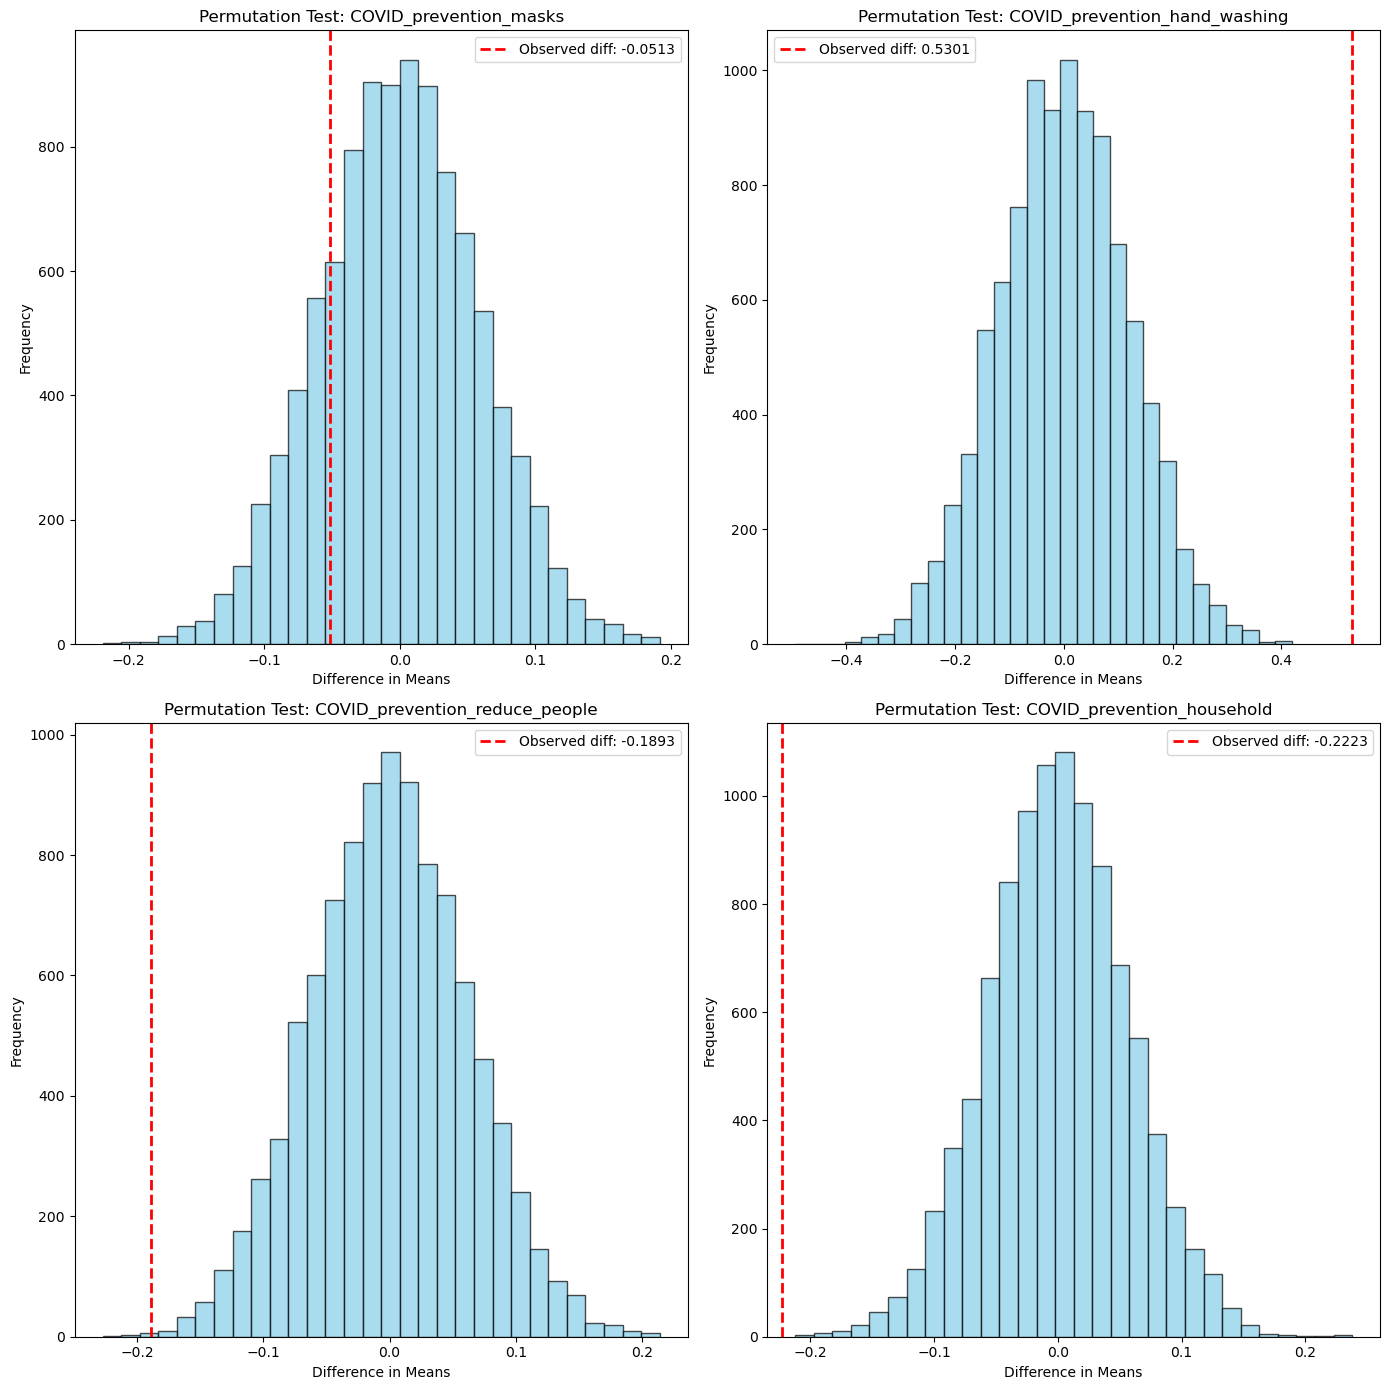

In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.utils import shuffle

# Load the column names and main dataset, handling missing values
cols = pd.read_csv("https://raw.githubusercontent.com/pointOfive/stat130chat130/main/CP/var_names.csv")
data = pd.read_csv("https://raw.githubusercontent.com/pointOfive/stat130chat130/main/CP/CSCS_data_anon.csv",
                   na_values=["9999", "", " ", "Presented but no response", "NA"])

# Step 1: Filter for cross-sectional data only
data_cross = data[data['REMOVE_case'] == 'No'].copy()

# Specify the COVID columns
COVID_columns = [
    'COVID_prevention_masks', 
    'COVID_prevention_hand_washing',
    'COVID_prevention_reduce_people',
    'COVID_prevention_household'
]

# Drop rows with missing values in relevant columns
data_cross = data_cross.dropna(subset=COVID_columns + ['WELLNESS_life_satisfaction'])

# Function to perform permutation test and plot results
def permutation_test(data, group_col, outcome_col, category_group, category_2, n_permutations=10000):
    # Group the data by the category
    group1 = data[data[group_col].isin(category_group)][outcome_col]  # Category group: Very closely and Somewhat closely
    group2 = data[data[group_col] == category_2][outcome_col]  # Category 2: Not at all
    
    # Calculate the observed difference in means
    observed_diff = np.mean(group1) - np.mean(group2)
    
    # Combine both groups for permutation testing
    combined_data = np.concatenate([group1, group2])
    
    # Initialize an array to store the permutation differences
    perm_diffs = np.zeros(n_permutations)
    
    # Permutation loop
    for i in range(n_permutations):
        # Shuffle the combined data and split into two groups again
        shuffled_data = shuffle(combined_data)
        perm_group1 = shuffled_data[:len(group1)]
        perm_group2 = shuffled_data[len(group1):]
        
        # Calculate the difference in means for the permuted groups
        perm_diffs[i] = np.mean(perm_group1) - np.mean(perm_group2)
    
    return observed_diff, perm_diffs

# Plotting function to create the plot with only the observed difference and the simulated population
def plot_permutation_results(ax, observed_diff, perm_diffs, predictor_name):
    # Create a histogram of the permutation differences
    ax.hist(perm_diffs, bins=30, color='skyblue', edgecolor='black', alpha=0.7)
    
    # Plot the observed difference
    ax.axvline(observed_diff, color='red', linestyle='dashed', linewidth=2, label=f'Observed diff: {observed_diff:.4f}')
    
    # Add titles and labels
    ax.set_title(f'Permutation Test: {predictor_name}')
    ax.set_xlabel('Difference in Means')
    ax.set_ylabel('Frequency')
    ax.legend()

# Prepare the plotting grid (2x2)
fig, axes = plt.subplots(2, 2, figsize=(14, 14))
axes = axes.flatten()  # Flatten the axes to loop through them easily

# Perform the permutation test for each predictor variable and plot results
n_permutations = 10000  # Number of permutations

plot_idx = 0  # Index for the subplot grid
for col in COVID_columns:
    print(f"Permutation test for {col}:")
    
    # Check if 'Not at all' and ('Very closely' or 'Somewhat closely') categories are present
    if 'Not at all' in data_cross[col].values:
        # Group 'Very closely' and 'Somewhat closely' together
        category_group = ['Very closely', 'Somewhat closely']
        observed_diff, perm_diffs = permutation_test(
            data_cross, col, 'WELLNESS_life_satisfaction', category_group, 'Not at all', n_permutations
        )
        
        # Output the results
        print(f"Observed difference for {col}: {observed_diff:.4f}")
        
        # Plot the results for each predictor in the corresponding subplot
        plot_permutation_results(axes[plot_idx], observed_diff, perm_diffs, col)
        
        plot_idx += 1  # Move to the next subplot

# Adjust layout for better spacing
plt.tight_layout()
plt.show()
